In [1]:
import numpy as np
import pandas as pd
# visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
# preprocessing
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split ,GridSearchCV
# models 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn.tree import DecisionTreeRegressor
# evaulation 
from sklearn.metrics import r2_score ,mean_absolute_error,ConfusionMatrixDisplay,confusion_matrix,accuracy_score
import warnings 
warnings.filterwarnings('ignore')

# Read DataSet

In [2]:
df=pd.read_csv(r"D:\Route\assign\regression_project_data.csv")

# 2 Explore Data:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [5]:
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [6]:
df.shape

(17954, 51)

In [18]:
df.isnull().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

In [7]:
df.duplicated().sum()

0

# Data Visualization

<Axes: xlabel='age', ylabel='Density'>

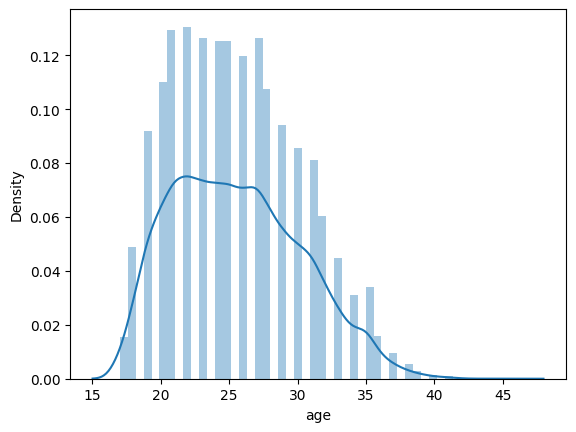

In [8]:
sns.distplot(df['age'])

In [9]:
df['nationality'].value_counts()

nationality
England                 1658
Germany                 1199
Spain                   1070
France                   925
Argentina                904
                        ... 
Papua New Guinea           1
South Sudan                1
Malta                      1
Yemen                      1
United Arab Emirates       1
Name: count, Length: 160, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

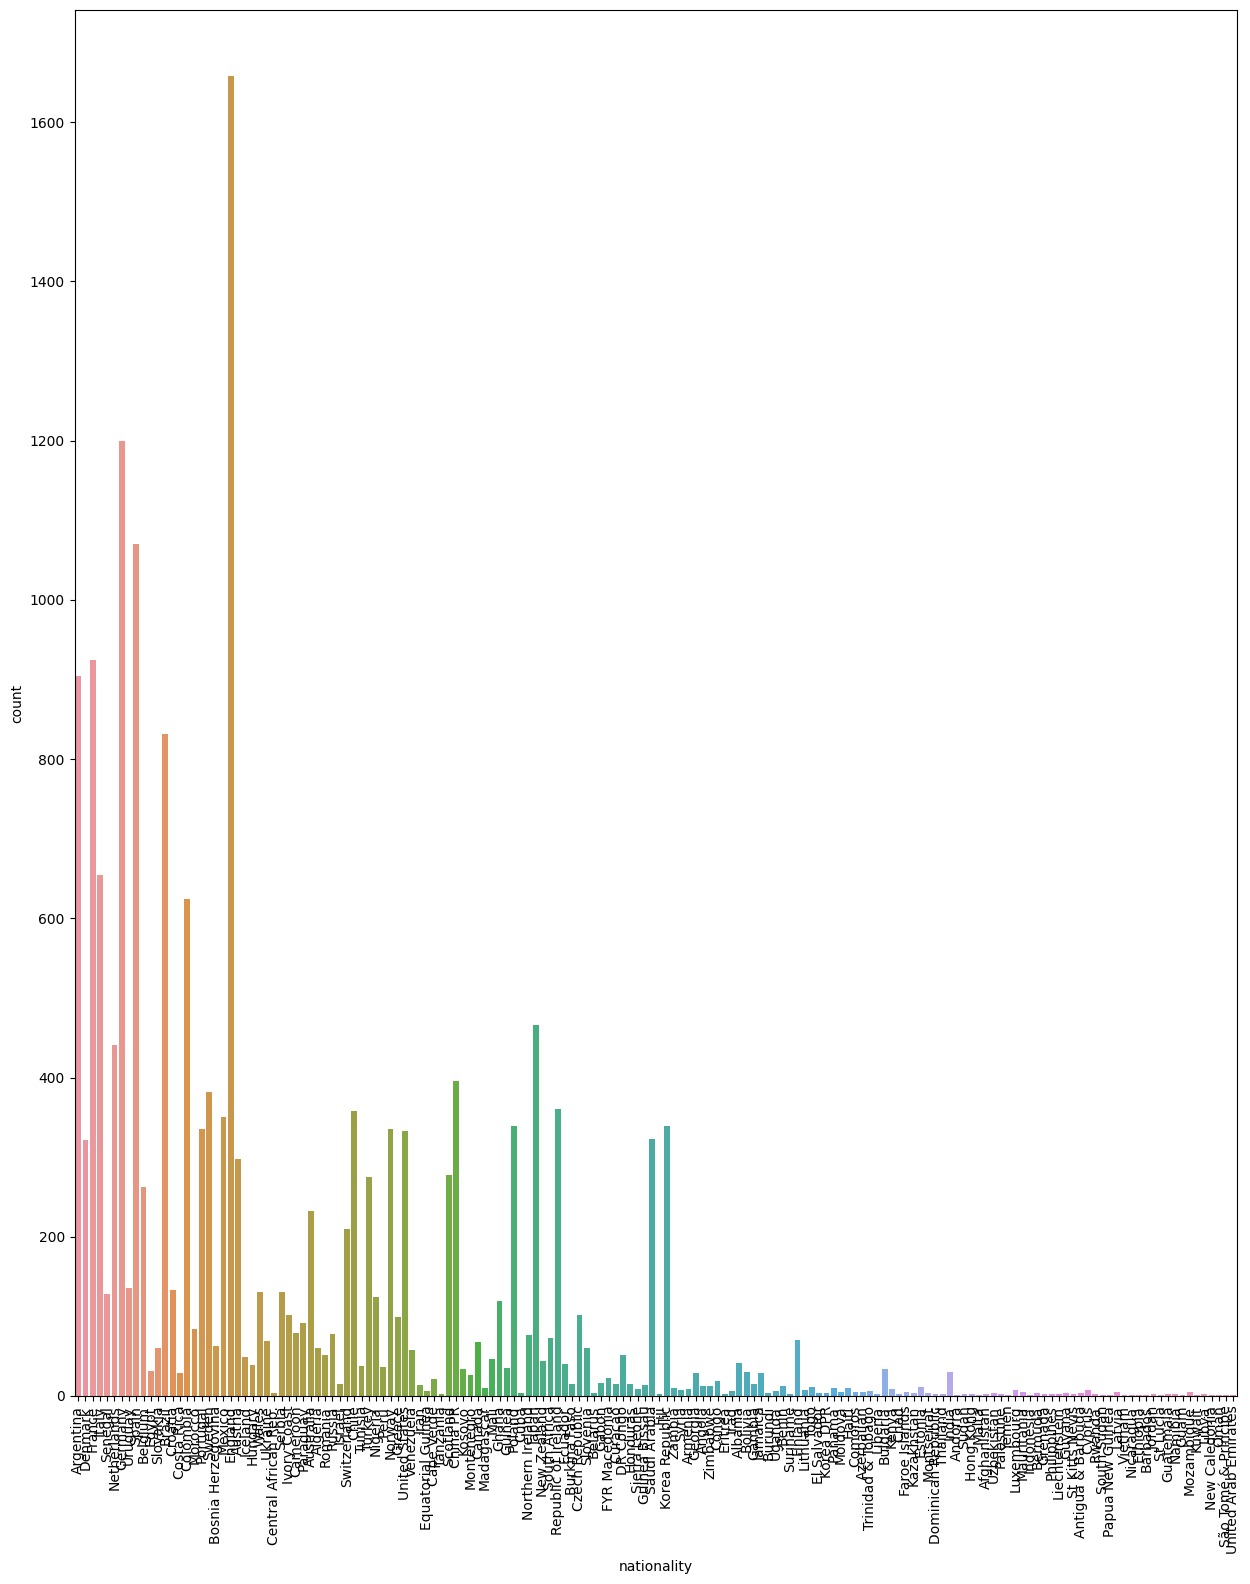

In [10]:
plt.figure(figsize=(15,18))
sns.countplot(x='nationality',data=df)
plt.xticks(rotation=90)
plt.show

<Axes: xlabel='overall_rating', ylabel='Density'>

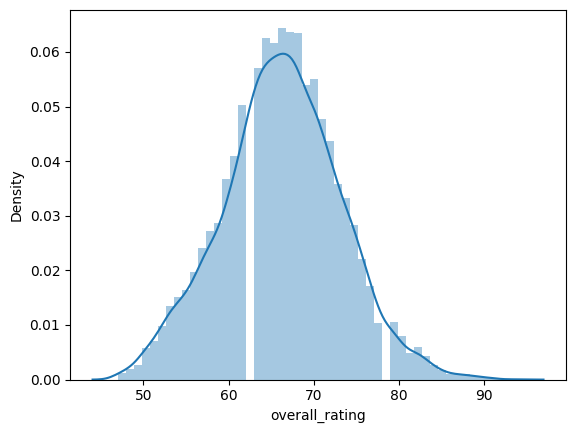

In [11]:
sns.distplot(df['overall_rating'])

In [12]:
df['overall_rating'].unique() 

array([94, 88, 89, 86, 87, 84, 85, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74,
       73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57,
       56, 55, 54, 53, 52, 51, 50, 49, 47, 48, 90, 91, 92], dtype=int64)

<Axes: xlabel='potential', ylabel='value_euro'>

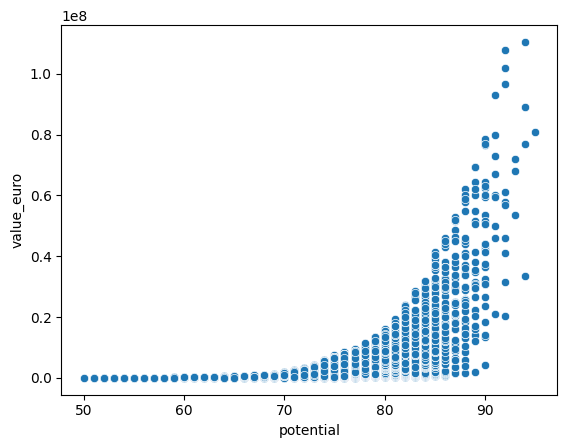

In [13]:
sns.scatterplot(x='potential',y='value_euro',data=df)

# Data Preprocessing

In [14]:
df.drop(columns=['full_name', 'birth_date', 'nationality', 'value_euro', 'wage_euro', 'preferred_foot', 'release_clause_euro', 'national_team', 'national_rating', 'national_team_position', 'national_jersey_number'],inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            17954 non-null  int64  
 1   height_cm                      17954 non-null  float64
 2   weight_kgs                     17954 non-null  float64
 3   positions                      17954 non-null  int32  
 4   overall_rating                 17954 non-null  int64  
 5   potential                      17954 non-null  int64  
 6   international_reputation(1-5)  17954 non-null  int64  
 7   weak_foot(1-5)                 17954 non-null  int64  
 8   skill_moves(1-5)               17954 non-null  int64  
 9   body_type                      17954 non-null  int32  
 10  crossing                       17954 non-null  int64  
 11  finishing                      17954 non-null  int64  
 12  heading_accuracy               17954 non-null 

In [15]:
encoder=LabelEncoder()

In [16]:
df.drop(columns='name',inplace=True)

In [17]:
df['positions']=encoder.fit_transform(df['positions'])

In [18]:
df['body_type']=encoder.fit_transform(df['body_type'])

In [19]:
df.isnull().sum()

age                              0
height_cm                        0
weight_kgs                       0
positions                        0
overall_rating                   0
potential                        0
international_reputation(1-5)    0
weak_foot(1-5)                   0
skill_moves(1-5)                 0
body_type                        0
crossing                         0
finishing                        0
heading_accuracy                 0
short_passing                    0
volleys                          0
dribbling                        0
curve                            0
freekick_accuracy                0
long_passing                     0
ball_control                     0
acceleration                     0
sprint_speed                     0
agility                          0
reactions                        0
balance                          0
shot_power                       0
jumping                          0
stamina                          0
strength            

In [20]:
np.max(df,axis=0)

age                               46.00
height_cm                        205.74
weight_kgs                       110.20
positions                        889.00
overall_rating                    94.00
potential                         95.00
international_reputation(1-5)      5.00
weak_foot(1-5)                     5.00
skill_moves(1-5)                   5.00
body_type                          9.00
crossing                          93.00
finishing                         95.00
heading_accuracy                  94.00
short_passing                     93.00
volleys                           90.00
dribbling                         97.00
curve                             94.00
freekick_accuracy                 94.00
long_passing                      93.00
ball_control                      96.00
acceleration                      97.00
sprint_speed                      96.00
agility                           96.00
reactions                         96.00
balance                           96.00


In [21]:
np.min(df,axis=0)

age                               17.0
height_cm                        152.4
weight_kgs                        49.9
positions                          0.0
overall_rating                    47.0
potential                         48.0
international_reputation(1-5)      1.0
weak_foot(1-5)                     1.0
skill_moves(1-5)                   1.0
body_type                          0.0
crossing                           5.0
finishing                          2.0
heading_accuracy                   4.0
short_passing                      7.0
volleys                            3.0
dribbling                          4.0
curve                              6.0
freekick_accuracy                  3.0
long_passing                       9.0
ball_control                       5.0
acceleration                      12.0
sprint_speed                      12.0
agility                           11.0
reactions                         24.0
balance                           16.0
shot_power               

# split data

In [22]:
x=df.drop(['overall_rating'],axis=1)
y=df.overall_rating

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=42)

In [24]:
print('x_train shape',x_train.shape)
print('y_train shape',y_train.shape)

x_train shape (12567, 38)
y_train shape (12567,)


In [25]:
print('x_test shape',x_test.shape)
print('y_test shape',y_test.shape)

x_test shape (5387, 38)
y_test shape (5387,)


In [53]:
# dimension reduction

In [47]:
pca = PCA(n_components = 15)

In [48]:
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [49]:
pca.explained_variance_ratio_.sum()

0.9933008881905601

# models

In [50]:
models={
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'SVR':SVR(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'XGBRegressor':XGBRegressor()
}

In [31]:
def evaluate_model(actuall,predicted):
    scores=r2_score(actuall,predicted)
    return scores

In [52]:
list_scores=[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    
    model.fit(x_train_pca,y_train)
    
    test_predict=model.predict(x_test_pca)
    train_predict=model.predict(x_train_pca)
    
    train_score=evaluate_model(y_train,train_predict)
    test_score=evaluate_model(y_test,test_predict)
    
    
    
    print('model ',model,' test r2_score',test_score,'train r2_score',train_score) 
    list_scores.append(test_score)

model  LinearRegression()  test r2_score 0.7907197136573689 train r2_score 0.7912202681312872
model  RandomForestRegressor()  test r2_score 0.912916129953646 train r2_score 0.9873140923976521
model  DecisionTreeRegressor()  test r2_score 0.8003469196923878 train r2_score 1.0
model  SVR()  test r2_score 0.8996748625339759 train r2_score 0.9038121667692396
model  KNeighborsRegressor()  test r2_score 0.8882137474863314 train r2_score 0.9263645193981664
model  AdaBoostRegressor()  test r2_score 0.7615715121897781 train r2_score 0.7635579188058093
model  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_thresho

# model evaluation 

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test,test_predict)

1.3523343300275021

In [56]:
mean_squared_error(y_test,test_predict)

3.9077890274956477